# RTML Final 2022

Welcome to the RTML final exam, version 2022!

Prepare your answer to each question, writing your answers directly in this notebook, print as PDF, and turn in via Google Classroom by the deadline.

You have 2.5 hours to complete the exam. Good luck!

## Question 1 (20 points)

Suppose you have a dataset consisting of 500 essays on the assigned topic,
"Why is it so difficult to produce a computer program that can pass the Turing Test?"
The essays are by Data Science and AI students from all over Asia and are each 250-350 words long.

Suppose further that having taken RTML, you know a lot about GANs and RNNs, so you decide to build a recurrent
GAN to generate fresh essays on the same topic.

Explain in detail how you could use a LSTM-based RNN as the generator in a GAN with this goal.
Be sure to indicate the detailed structure of the generator and discriminator, the loss functions,
how the models are trained, how the cell/hidden state is initialized, what is the input to the model
during training, and how the resulting model is used for inference.

*Write your answer here.*

From my point of view, this proposed goal is to use a generative model to create summaries from the input data sets (an essay). Firstly, a GAN can be decomposed into two adversaries, a discriminator and a generator. The probability  distribution learning problem is solved using the minimax algorithm. The generator performs the task of generating samples and the discriminator is a binary classifier with the task of separating the real samples from the fake ones. Paraphrase detection algorithm proposed is used to reduce the redundancy in the text by removing duplicate paraphrases. The output generated without redundant content is then passed as an input to GANs. The building blocks for the GAN are GRU(taxonomy of LSTM), and Recurrent Neural Networks are used for comparisons.

- Output of the paraphrase detection is passed as an input to the generator. Inside the LSTM, at every step  is provided as input sequence to the network  from the previous step is also given to the network.
- The network updates the currently hidden state based on the previously hidden state. 
- Embeddings from the text are generated to be passed as the input to the generator. 
- The probability distribution is then calculated by the network over the next element in the sequence. 
- The softmax layer on top of the hidden layer generates discrete output. 
- The output of the generator is discrete and hence can’t be differentiated by the discriminator. 
- The generated text is passed to the generator for classification and  also back-propagates from the discriminator to the generate. 
- The discriminator maximizes the probability of differentiating correctly between the output  on the hidden state versus the input embedding. The loss function used is a weighted sum of individual loss functions mentioned in the following equations. 

Lossdiscrimnator = −1/2E(x,y) data[log(D(B(x, y, θg), θd))] − 1/2Ey Pθg [log(1 − D(B(x, y, θg), θd))] 

Lossgenerator = −1/2E(x,y) data[log(Pθg )] 


I made some references from "Deep Text Summarization using Generative Adversarial Networks" paper.

## Question 2 (10 points)

Explain how could BERT be fine tuned on the task of Question 1 and how the resulting model would be used for inference.

*Write your answer here.*

Since, I proposed the goal from Qustion1 as text summarization problem. So firstly, there are two types of summarization: abstractive and extractive summarization. Abstractive summarization basically means rewriting key points while extractive summarization generates summary by copying directly the most important spans/sentences from a document.
Abstractive summarization is more challenging for humans, and also more computationally expensive for machines. However, which summaration is better depends on the purpose of the end user. 



In this section, I just want to explore BERT summarizer which has 2 parts: a BERT encoder and a summarization classifier.
The task of extractive summarization is a binary classification problem at the sentence level. I want to assign each sentence a label $y_i \in {0, 1}$ indicating whether the sentence should be included in the final summary. Therefore, I need to add a token [CLS] before each sentence. After I run a forward pass through the encoder, the last hidden layer of these [CLS] tokens will be used as the representions for my sentences.

After getting the vector representation of each sentence, I can use a simple feed forward layer as our classifier to return a score for each sentence.


## Question 3 (10 points)

In Lab 12, we implemented the basic REINFORCE algorithm on CartPole.
Run your trained REINFORCE model on CartPole. Show a screenshot of your trained
REINFORCE model playing the game here.

*Put your screenshot here*

The below cell shows that the screenshot of cartpole video running with REINFORCE algotithm.

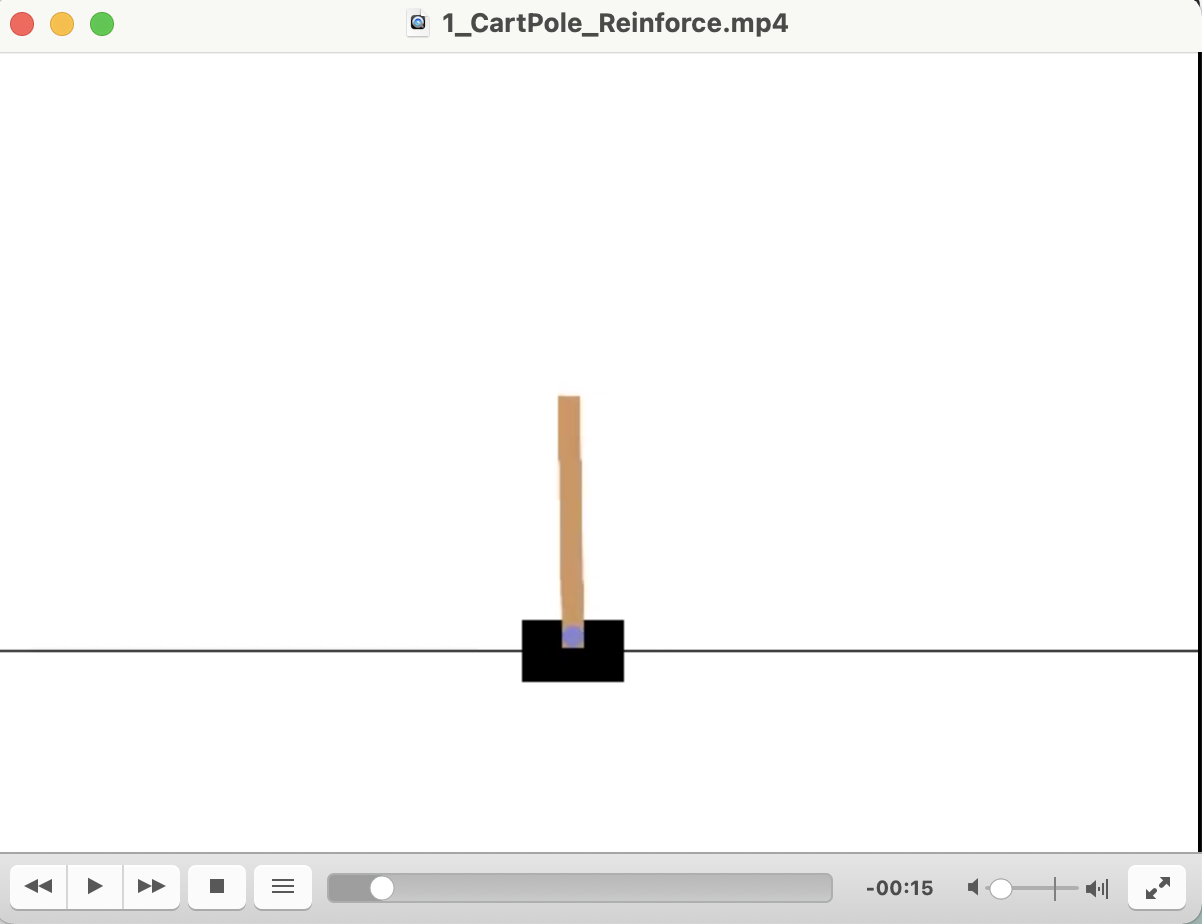

The below cell shows that the running proof of cartpole with REINFORCE algorithm.

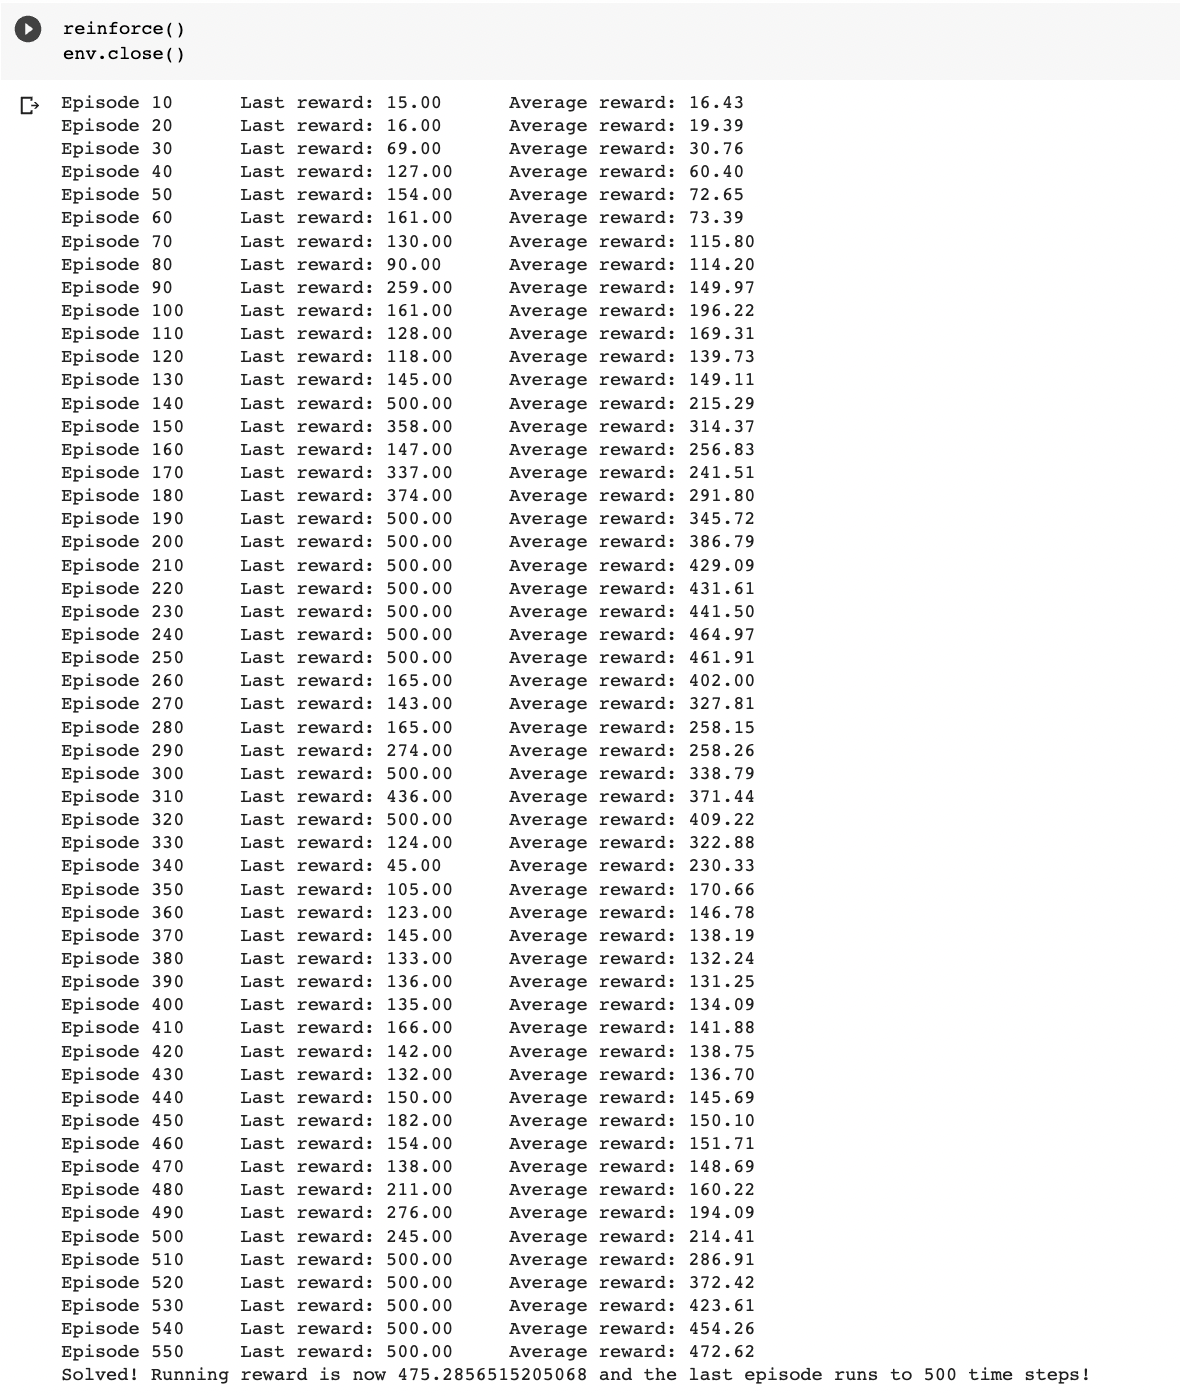

## Question 4 (20 points)

Next, let's replace the policy network that is currently working with the fully observed MDP with a POMDP using only the image
of the environment as the observation.

If you completed Lab 12, you should already have an implementation of REINFORCE on Space Invaders that you can reuse.

By default, CartPole will render at 600x400 resolution. We will want to downscale that, perhaps to 150x100, and stack subsequent
frames, perhaps 4 of them, in order to provide some history information.

Below, show a revision of your REINFORCE policy model that takes as input a stack of the four most recent downscaled grayscale
images and outputs an action. The model should have an appropriate series of convolutions, one or more fully connected layers,
and a linear/softmax layer that ouptuts an action.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import sys

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.distributions import Categorical


In [ ]:
# Code for visual Policy model goes here

In [9]:


from garage.envs.wrappers import PixelObservationWrapper, Grayscale, Resize

env = gym.make("CartPole-v1")
#env.reset()
env = PixelObservationWrapper(env)
env = Grayscale(env)
env = Resize(env, 150, 100)
#env = StackFrames(env, 4)

obs = env.reset()
plt.imshow(obs, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()


GLFW error (code %d): %s 65544 b'X11: The DISPLAY environment variable is missing'
GLFW error (code %d): %s 65544 b'X11: The DISPLAY environment variable is missing'


GlfwError: ignored

For the above error, I have already got the grey scale image which I attached in the below cell. Firstly, I run on the google colab and now I change to the local jupyter to complete some writing questions and easy to convert to pdf form. So, I just want to show my work I have done.

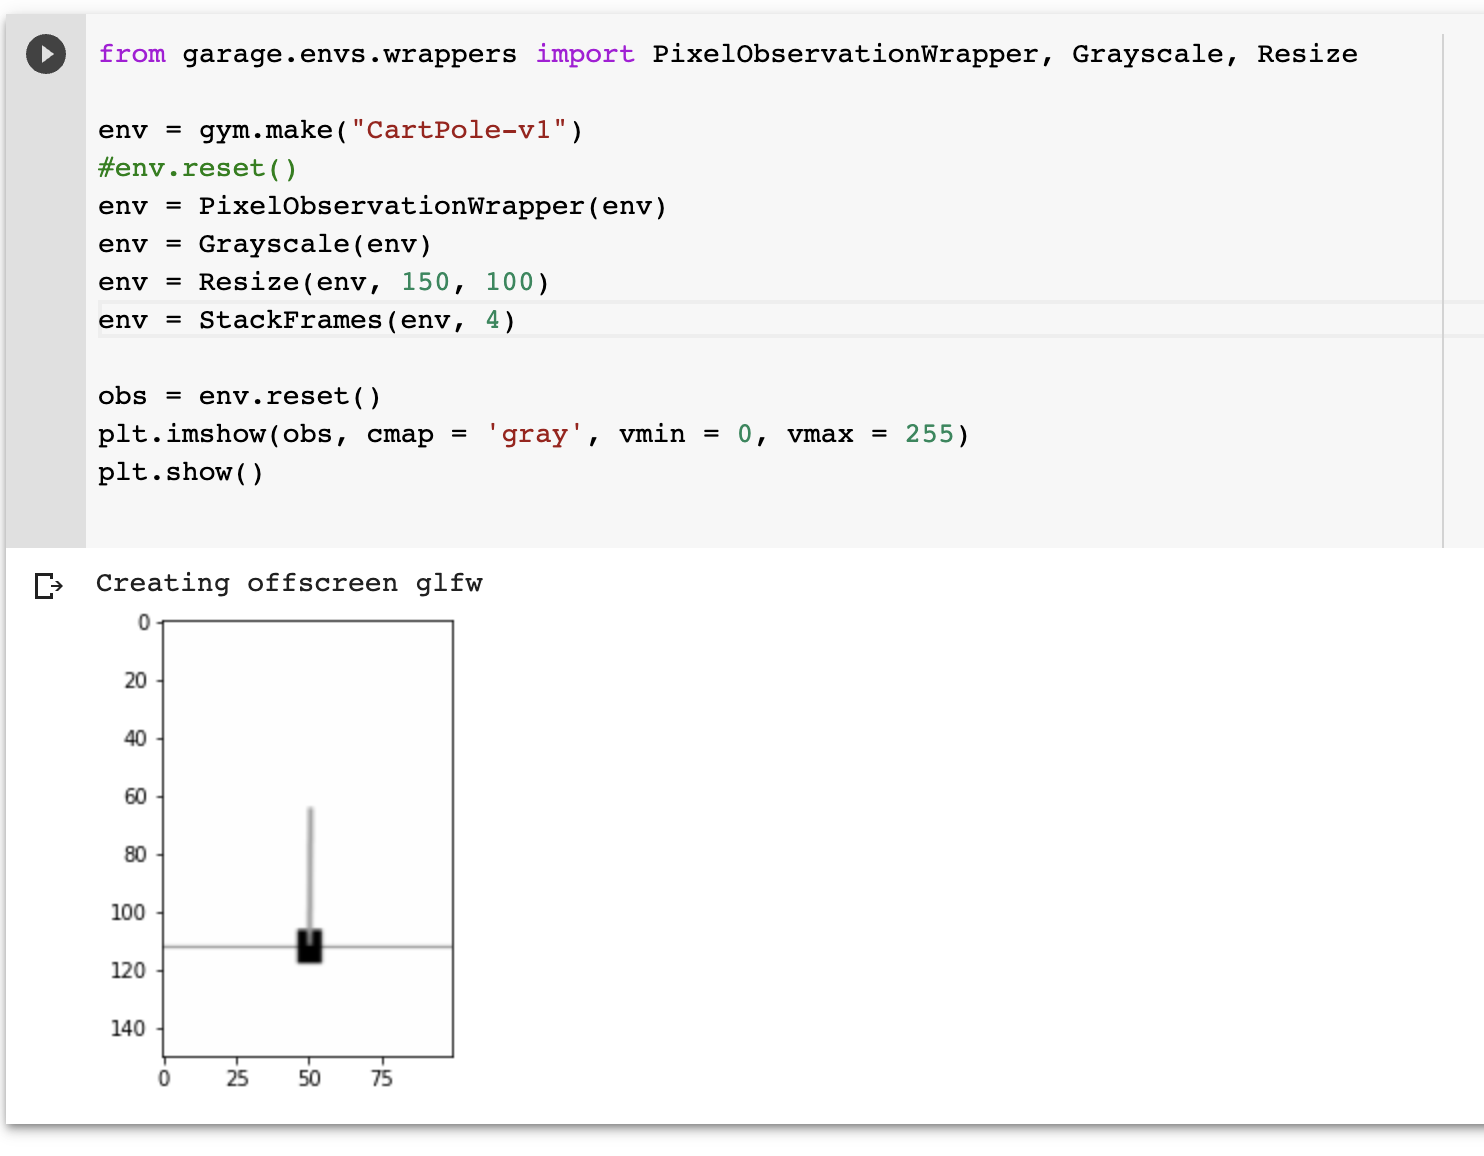

In [ ]:
gamma = 0.95
seed = 0
render = False
log_interval = 10

In [ ]:
class Policy(nn.Module):
    def __init__(self, env):
        super(Policy, self).__init__()
        self.n_inputs = env.observation_space.shape[0]
        self.n_outputs = env.action_space.n
        
        self.affine1 = nn.Linear(self.n_inputs, 128)
        self.dropout = nn.Dropout(p=0.6)
        self.affine2 = nn.Linear(128, self.n_outputs)

        self.saved_log_probs = []
        self.rewards = []

    def forward(self, x):
        x = self.affine1(x)
        x = self.dropout(x)
        x = F.relu(x)
        action_scores = self.affine2(x)
        return F.softmax(action_scores, dim=1)
    
    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        self.saved_log_probs.append(m.log_prob(action))
        return action.item()


In [ ]:
policy = Policy(env)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)
eps = np.finfo(np.float32).eps.item()

In [ ]:
def finish_episode():
    R = 0
    policy_loss = []
    returns = []
    for r in policy.rewards[::-1]:
        R = r + gamma * R
        returns.insert(0, R)
    returns = torch.tensor(returns)
    returns = (returns - returns.mean()) / (returns.std() + eps)
    for log_prob, R in zip(policy.saved_log_probs, returns):
        policy_loss.append(-log_prob * R)
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward()
    optimizer.step()
    del policy.rewards[:]
    del policy.saved_log_probs[:]

In [ ]:
from itertools import count
def reinforce():
    running_reward = 10
    for i_episode in count(1):
        state, ep_reward = env.reset(), 0
        for t in range(1, 10000):  # Don't infinite loop while learning
            action = policy.select_action(state)
            state, reward, done, _ = env.step(action)
            if render:
                env.render()
            policy.rewards.append(reward)
            ep_reward += reward
            if done:
                break

        # calculate reward
        # It accepts a list of rewards for the whole episode and needs to calculate 
        # the discounted total reward for every step. To do this efficiently,
        # we calculate the reward from the end of the local reward list.
        # The last step of the episode will have the total reward equal to its local reward.
        # The step before the last will have the total reward of ep_reward + gamma * running_reward
        running_reward = 0.05 * ep_reward + (1 - 0.05) * running_reward
        finish_episode()
        if i_episode % log_interval == 0:
            print('Episode {}\tLast reward: {:.2f}\tAverage reward: {:.2f}'.format(
                  i_episode, ep_reward, running_reward))
        if running_reward > env.spec.reward_threshold:
            print("Solved! Running reward is now {} and "
                  "the last episode runs to {} time steps!".format(running_reward, t))
            break

In [ ]:
reinforce()
env.close()

Episode 10	Last reward: 29.00	Average reward: 18.18
Episode 20	Last reward: 61.00	Average reward: 25.88
Episode 30	Last reward: 34.00	Average reward: 37.70
Episode 40	Last reward: 39.00	Average reward: 41.22
Episode 50	Last reward: 40.00	Average reward: 50.30
Episode 60	Last reward: 113.00	Average reward: 64.35
Episode 70	Last reward: 171.00	Average reward: 105.35
Episode 80	Last reward: 205.00	Average reward: 113.53
Episode 90	Last reward: 62.00	Average reward: 126.27
Episode 100	Last reward: 17.00	Average reward: 95.85
Episode 110	Last reward: 18.00	Average reward: 69.25
Episode 120	Last reward: 46.00	Average reward: 52.89
Episode 130	Last reward: 102.00	Average reward: 64.50
Episode 140	Last reward: 125.00	Average reward: 113.95
Episode 150	Last reward: 235.00	Average reward: 211.79
Episode 160	Last reward: 101.00	Average reward: 183.22
Episode 170	Last reward: 56.00	Average reward: 137.83
Episode 180	Last reward: 138.00	Average reward: 117.84
Episode 190	Last reward: 125.00	Average

Next, demonstrate that your policy model when given a 4x100x150 tensor of zeros outputs, the policy model outputs an appropriate
shaped vector representing a multinomial distribution over the action space.

In [ ]:
# Code to run random tensor through Policy network goes here

In [ ]:
class PolicyNet(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_layer_size=64):
        super(PolicyNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_layer_size)
        self.fc2 = torch.nn.Linear(hidden_layer_size, output_size)
        self.softmax = torch.nn.Softmax(dim=0)

    def forward(self, x):
        x = torch.from_numpy(x).float()
        return self.softmax(self.fc2(torch.nn.functional.relu(self.fc1(x))))

    def get_action_and_logp(self, x):
        action_prob = self.forward(x)
        m = torch.distributions.Categorical(action_prob)
        action = m.sample()
        logp = m.log_prob(action)
        return action.item(), logp

    def act(self, x):
        action, _ = self.get_action_and_logp(x)
        return action


In [ ]:
class ValueNet(torch.nn.Module):
    def __init__(self, input_size, hidden_layer_size=64):
        super(ValueNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_layer_size)
        self.fc2 = torch.nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        x = torch.from_numpy(x).float()
        return self.fc2(torch.nn.functional.relu(self.fc1(x)))

In [ ]:
import torch
import gym
from collections import namedtuple

def vpg(env, num_iter=200, num_traj=10, max_num_steps=1000, gamma=0.98,
        policy_learning_rate=0.01, value_learning_rate=0.01,
        policy_saved_path='vpg_policy.pt', value_saved_path='vpg_value.pt'):
    input_size = env.observation_space.shape[0]
    output_size = env.action_space.n
    Trajectory = namedtuple('Trajectory', 'states actions rewards dones logp')

    def collect_trajectory():
        state_list = []
        action_list = []
        reward_list = []
        dones_list = []
        logp_list = []
        state = env.reset()
        done = False
        steps = 0
        while not done and steps <= max_num_steps:
            action, logp = policy.get_action_and_logp(state)
            newstate, reward, done, _ = env.step(action)
            #reward = reward + float(state[0])
            state_list.append(state)
            action_list.append(action)
            reward_list.append(reward)
            dones_list.append(done)
            logp_list.append(logp)
            steps += 1
            state = newstate

        traj = Trajectory(states=state_list, actions=action_list,
                          rewards=reward_list, logp=logp_list, dones=dones_list)
        return traj

    def calc_returns(rewards):
        dis_rewards = [gamma**i * r for i, r in enumerate(rewards)]
        return [sum(dis_rewards[i:]) for i in range(len(dis_rewards))]

    policy = PolicyNet(input_size, output_size)
    value = ValueNet(input_size)
    policy_optimizer = torch.optim.Adam(
        policy.parameters(), lr=policy_learning_rate)
    value_optimizer = torch.optim.Adam(
        value.parameters(), lr=value_learning_rate)

    mean_return_list = []
    for it in range(num_iter):
        traj_list = [collect_trajectory() for _ in range(num_traj)]
        returns = [calc_returns(traj.rewards) for traj in traj_list]

        policy_loss_terms = [-1. * traj.logp[j] * (returns[i][j] - value(traj.states[j]))
                             for i, traj in enumerate(traj_list) for j in range(len(traj.actions))]

        policy_loss = 1. / num_traj * torch.cat(policy_loss_terms).sum()
        policy_optimizer.zero_grad()
        policy_loss.backward()
        policy_optimizer.step()

        value_loss_terms = [1. / len(traj.actions) * (value(traj.states[j]) - returns[i][j])**2.
                            for i, traj in enumerate(traj_list) for j in range(len(traj.actions))]
        value_loss = 1. / num_traj * torch.cat(value_loss_terms).sum()
        value_optimizer.zero_grad()
        value_loss.backward()
        value_optimizer.step()

        mean_return = 1. / num_traj * \
            sum([traj_returns[0] for traj_returns in returns])
        mean_return_list.append(mean_return)
        if it % 10 == 0:
            print('Iteration {}: Mean Return = {}'.format(it, mean_return))
            torch.save(policy.state_dict(), policy_saved_path)
            torch.save(value.state_dict(), value_saved_path)
    return policy, mean_return_list

## Question 5 (20 points)

Modify the `reinforce()` function to generate the visual input to the Policy model rather than the fully
observed state.

In your code, after each of the following lines

    state, ep_reward = env.reset(), 0
    
    ...
    
        state, reward, done, _ = env.step(action)
    
please add code to replace the fully observed state with the observation:

    obs_t = env.render(mode="rgb_array")
    obs_seq.append(obs_t)
    state = make_observation(obs_seq)

You'll have to add some code to initialize the `obs_seq` array appropriately and write the `make_observation()` function
to convert the four most recent observations to grayscale and stack them in a tensor that your policy
network can use.

In [ ]:
# Place revised reinforce() code here

In [ ]:
# def make_obervation():
#   obs_seq = []
#   obs_t = env.render(mode="rgb_array")
#   obs_seq.append(obs_t)
#   state = make_observation(obs_seq)


from garage.envs.wrappers import PixelObservationWrapper, Grayscale, Resize

def make_observation():
    env = gym.make("CartPole-v1")
    env = PixelObservationWrapper(env)
    env = Grayscale(env)
    env = Resize(env, 150, 100)
    env = StackFrames(env, 4)


In [ ]:
from itertools import count
def reinforce():
    obs_seq = []
    running_reward = 10
    for i_episode in count(1):
        state, ep_reward = env.reset(), 0

        obs_t = env.render(mode="rgb_array")
        obs_seq.append(obs_t)
        state = make_observation(obs_seq)

        for t in range(1, 10000):  # Don't infinite loop while learning
            action = policy.select_action(state)

            state, reward, done, _ = env.step(action)
            obs_t = env.render(mode="rgb_array")
            obs_seq.append(obs_t)
            state = make_observation(obs_seq)
            if render:
                env.render()
            policy.rewards.append(reward)
            ep_reward += reward
            if done:
                break

        running_reward = 0.05 * ep_reward + (1 - 0.05) * running_reward
        finish_episode()
        if i_episode % log_interval == 0:
            print('Episode {}\tLast reward: {:.2f}\tAverage reward: {:.2f}'.format(
                  i_episode, ep_reward, running_reward))
        if running_reward > env.spec.reward_threshold:
            print("Solved! Running reward is now {} and "
                  "the last episode runs to {} time steps!".format(running_reward, t))
            break

Show that the resulting policy model can be trained for a few episodes. You don't have to train the model to perfection -- you can do it on your own PC in CPU mode and just
show that policy model is learning.

In [ ]:
# Code to train for a few episodes goes here

In [ ]:
reinforce()

error: ignored

## Question 6 (10 points)

What are the major differences between this visual REINFORCE method and Mnih et al.'s DQN method?

*Your answer goes here.*

REINFORCE is different from Q-learning in several important aspects:

- No explicit exploration is needed. In Q-learning, we use an -greedy strategy to explore the environment and prevent our agent from getting stuck with a non-optimal policy. Now, with action probabilities returned by the network, the exploration is performed automatically so long as there is a non-zero probability for every action. Since the network is initialized with random weights, in the beginning, the action will be approximately uniform, corresponding to random agent behavior.
- No replay buffer is used. PG methods are on-policy meaning we don’t train on data obtained from an old version of the policy. On policy methods are usually faster than off-policy methods in terms of the number of updates required, but they usually require much more interaction with the environment than off-policy methods such as DQN.
- No target network is needed. Here we use Q-values, but they’re obtained from our experience in the environment. In DQN, we used a target network to break correlations in Q-value approximation, but we’re not approximating it anymore. However, other PG methods do use a target network to estimate . These are called Actor-Critic methods.


- Policy methods are directly optimizing what we care about: our behavior. The value methods such as DQN are doing the same indirectly, learning the value first and providing to us policy based on this value.
- Policy methods are on-policy and require fresh samples from the environment. The value methods can benefit from old data, obtained from the old policy, human demonstration, and other sources.
- Policy methods are usually less sample-efficient, which means they require more interaction with the environment. The value methods can benefit from the large replay buffers. However, sample efficiency doesn’t mean that value methods are more computationally efficient and very often it’s the opposite. In the above example, during the training, we need to access our NN only once, to get the probabilities of actions. In DQN, we need to process two batch of states: one for the current state and another for the next state in the Bellman update.



## Question 7 (10 points)

What are the major differences between this visual REINFORCE method and the A2C (Advantage-Actor-Critic) method? In your answer, assume we make the
same modification to A2C to use visual observations instead of full state observations.

*Your answer goes here.*

The origin of the complete episodes requirement is to get as accurate a Q estimation as possible. When we talked about DQN, we saw that in practice, it’s fine to replace the exact value for a discounted reward with our estimation using the one-step Bellman equation Q(s,q
a). To estimate V(s), we’ve used our own Q-estimation, but in the case of PG, we dont have V(s) or Q(s,a). To overcome this, two approaches exist. On the one hand, we can ask our network to estimate V(s) and use this estimation to obtain Q.This approach is called the Actor-Critic method, which is the most popular method from the PG family.

The most fundamental differences between the approaches is in how they approach action selection, both whilst learning, and as the output (the learned policy). In Q-learning, the goal is to learn a single deterministic action from a discrete set of actions by finding the maximum value. With policy gradients, and other direct policy searches, the goal is to learn a map from state to action, which can be stochastic, and works in continuous action spaces.


policy gradient methods can solve problems that value-based methods cannot:

- Large and continuous action space. However, with value-based methods, this can still be approximated with discretisation - and this is not a bad choice, since the mapping function in policy gradient has to be some kind of approximator in practice.
- Stochastic policies. A value-based method cannot solve an environment where the optimal policy is stochastic requiring specific probabilities, such as Scissor/Paper/Stone. That is because there are no trainable parameters in Q-learning that control probabilities of action, the problem formulation in TD learning assumes that a deterministic agent can be optimal.
